In [1]:
import nltk
import random

In [5]:
from nltk.corpus import names

In [6]:
names.fileids()

['female.txt', 'male.txt']

In [8]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [15]:
name_cfd = nltk.ConditionalFreqDist((fileid, name[-2:]) for fileid in names.fileids() for name in names.words(fileid))

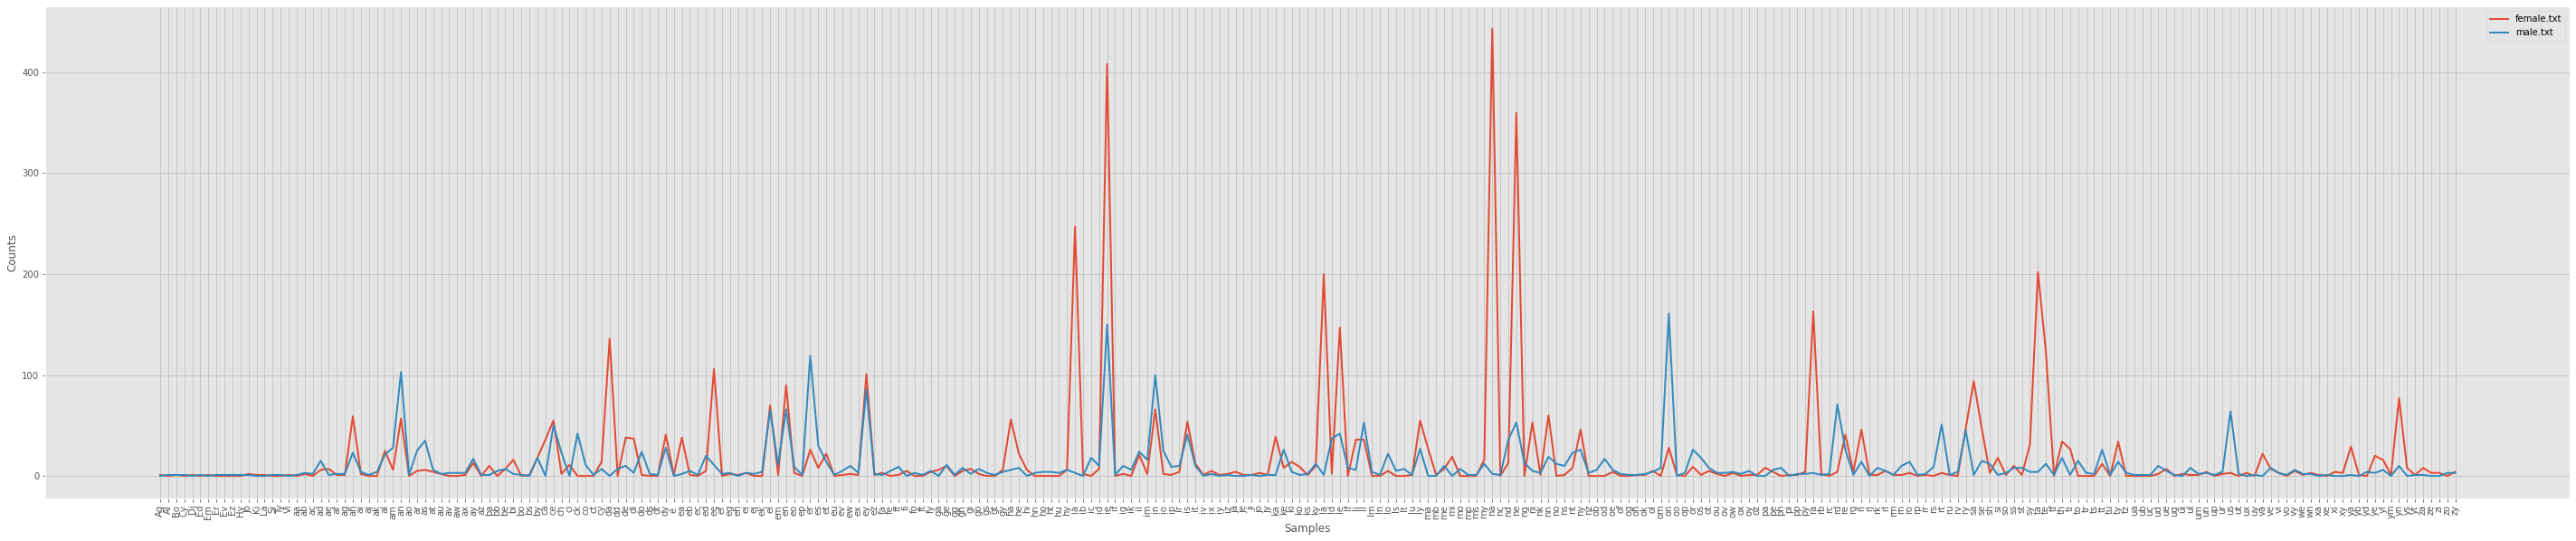

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
plt.figure(figsize=(50, 10))
name_cfd.plot()

In [18]:
def name_last(name):
    return {"pair": name[-2:]}

In [20]:
name_last("katy")

{'pair': 'ty'}

In [22]:
name_list = [(name, "male") for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')]

In [23]:
name_list[-10:]

[('Zonnya', 'female'),
 ('Zora', 'female'),
 ('Zorah', 'female'),
 ('Zorana', 'female'),
 ('Zorina', 'female'),
 ('Zorine', 'female'),
 ('Zsa Zsa', 'female'),
 ('Zsazsa', 'female'),
 ('Zulema', 'female'),
 ('Zuzana', 'female')]

In [24]:
random.shuffle(name_list)

In [26]:
name_list[:10]

[('Moss', 'male'),
 ('Doloritas', 'female'),
 ('Allina', 'female'),
 ('Fabrice', 'female'),
 ('Reg', 'male'),
 ('Janet', 'female'),
 ('Joelly', 'female'),
 ('Jorge', 'male'),
 ('Reed', 'male'),
 ('Jean-Paul', 'male')]

In [28]:
features = [ [name_last(name), gender]for (name,gender) in name_list]

In [30]:
features[:10]

[[{'pair': 'ss'}, 'male'],
 [{'pair': 'as'}, 'female'],
 [{'pair': 'na'}, 'female'],
 [{'pair': 'ce'}, 'female'],
 [{'pair': 'eg'}, 'male'],
 [{'pair': 'et'}, 'female'],
 [{'pair': 'ly'}, 'female'],
 [{'pair': 'ge'}, 'male'],
 [{'pair': 'ed'}, 'male'],
 [{'pair': 'ul'}, 'male']]

In [31]:
len(features)/2

3972.0

In [32]:
training = features[:3972]
testing = features[3972:]

In [34]:
classifier = nltk.NaiveBayesClassifier.train(training)

In [37]:
male_names = names.words('male.txt')

In [38]:
"Carmello" in male_names

False

In [41]:
classifier.classify(name_last('Carmello'))

'male'

In [42]:
nltk.classify.accuracy(classifier, testing)

0.7726586102719033